# Calculating DOS in a tight binding model with the KPM method

In this notebook we calculate the density of states in a finite tifht binding model for nodal loop semi metal in a tight binding lattice subject to an external magnetic field taken in to account through [Peierls substitution](https://en.wikipedia.org/wiki/Peierls_substitution). 
The lattice model without magnetic field corresponds to the bulk momentum space Hamiltonian 
\begin{equation}
\hat{H}({\bf k})=\left[\delta-2t\sum_i\cos(k_i)\right]\sigma_x-2t\sin(k_z)\sigma_z
\end{equation}
The magnetic field is taken in to account with a vector potential 
\begin{equation}
{\bf A}=\left (0,x\cos(\vartheta)-z\sin(\vartheta),0\right ).
\end{equation}

The DOS is evaluated with the [KPM](https://arxiv.org/abs/cond-mat/0504627) method as it is implemented in the [pybindig](https://github.com/dean0x7d/pybinding) package. 
This notebook just illustrates the used code, and the given parameters ar set up in such a way that the whole notebook should run under a couple of minutes (10 mins tops). The data reported in the manuscript is obtained by suitably cranking up the dimensions and widening magnetic field intervall to include smaller values. The file `nodal_dos.py` contains the code for batch execution. 

First let us setup our environment

In [1]:
%pylab inline
import pybinding as pb
import ipyvolume.pylab as ipv
import tqdm

Populating the interactive namespace from numpy and matplotlib


These couple of cells visualize the Fermi surface of the considered model. The Fermi surface, for small enough energies is a torus for $\delta=5t$.

In [2]:
# setting the parameters
delta=5
t=1
# sampling the BZ
kran=linspace(-pi,pi,51)
kx,ky,kz=meshgrid(kran,kran,kran)
Ek=sqrt((delta-2*t*cos(kx)-2*t*cos(ky)-2*t*cos(kz))**2+(2*t*sin(kz))**2)

The Fermi surface is visualized with the help of the [ipyvolume](https://ipyvolume.readthedocs.io/en/latest/) package.

In [3]:
# generating isosurface plots
ipv.figure()
surmesh=ipv.plot_isosurface(Ek,level=.4,controls=False)
surmesh.x=surmesh.x/(len(kran)-1)*2*pi-pi
surmesh.y=surmesh.y/(len(kran)-1)*2*pi-pi
surmesh.z=surmesh.z/(len(kran)-1)*2*pi-pi
ipv.xyzlim(min(kran),max(kran))
ipv.show()

VBox(children=(Figure(camera_center=[0.0, 0.0, 0.0], height=500, matrix_projection=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], matrix_world=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], meshes=[Mesh(texture=None, triangles=array([[  2,   1,   0],
       [  3,   0,   1],
       [  2,   0,   4],
       ...,
       [775, 760, 774],
       [766, 775, 762],
       [775, 766, 764]], dtype=uint32), x=array([-1.2578062 , -1.256637  , -1.256637  , -1.256637  , -1.2659527 ,
       -1.256637  , -1.256637  , -1.2578062 , -1.256637  , -1.256637  ,
       -1.256637  , -1.1332185 , -1.1309733 , -1.1309733 , -1.1309733 ,
       -1.1344271 , -1.1309733 , -1.1309733 , -1.1907644 , -1.1309733 ,
       -1.1344271 , -1.1309733 , -1.1726865 , -1.1309733 , -1.2325296 ,
       -1.1726865 , -1.1309733 , -1.1966277 , -1.1309733 , -1.1966277 ,
       -1.1309733 , -1.2049358 , -1.1309733 , -1.2049358 , -1.1309733 ,
       -1.1966277 , -1.1309733 , -1.1966277 , -1.1309733 , -1.1726865 ,
       -1.1309733 , -1.2325296 , -1.1726865 , -1.1309733 , -1.1344271 ,
       -1.1309733 , -1.1907644 , -1.1344271 , -1.1309733 , -1.1309733 ,
       -1.1309733 , -1.1332185 , -1.1309733 , -1.1309733 , -1.1309733 ,
       -1.0565171 , -1.0053096 , -1.0053096 , -1.0053096 , -1.069135  ,
       -1.0053096 , -1.0053096 , -1.069135  , -1.0053096 , -1.0053096 ,
       -1.0053096 , -1.0053096 , -1.0053096 , -1.0053096 , -1.0053096 ,
       -1.0053096 , -1.0053096 , -1.0053096 , -1.0053096 , -1.0053096 ,
       -1.0053096 , -1.0053096 , -1.0053096 , -1.0053096 , -1.069135  ,
       -1.0053096 , -1.069135  , -1.0053096 , -1.0053096 , -1.0565171 ,
       -1.0053096 , -1.0053096 , -1.0053096 , -1.0053096 , -0.89597917,
       -0.8796458 , -0.8796458 , -0.96176577, -0.8796458 , -0.89597917,
       -0.8796458 , -0.8796458 , -0.9945667 , -0.8796458 , -0.9945667 ,
       -0.8796458 , -0.8796458 , -0.8796458 , -0.8796458 , -0.8796458 ,
       -0.8796458 , -0.8796458 , -0.8796458 , -0.8796458 , -0.8796458 ,
       -0.8796458 , -0.8796458 , -0.8796458 , -0.8796458 , -0.8796458 ,
       -0.8796458 , -0.8796458 , -0.8796458 , -0.8796458 , -0.9945667 ,
       -0.8796458 , -0.9945667 , -0.8796458 , -0.89597917, -0.8796458 ,
       -0.96176577, -0.89597917, -0.8796458 , -0.8796458 , -0.8796458 ,
       -0.8796458 , -0.7722373 , -0.7539823 , -0.7539823 , -0.8451197 ,
       -0.7539823 , -0.7722373 , -0.7539823 , -0.7539823 , -0.7539823 ,
       -0.7539823 , -0.7539823 , -0.7539823 , -0.7539823 , -0.7539823 ,
       -0.7539823 , -0.7539823 , -0.7539823 , -0.8043792 , -0.7539823 ,
       -0.8043792 , -0.7539823 , -0.7539823 , -0.8358202 , -0.7539823 ,
       -0.78292346, -0.8358202 , -0.84605193, -0.79374766, -0.84605193,
       -0.8358202 , -0.78292346, -0.8358202 , -0.8043792 , -0.7539823 ,
       -0.7539823 , -0.8043792 , -0.7539823 , -0.7539823 , -0.7539823 ,
       -0.7539823 , -0.7539823 , -0.7539823 , -0.7539823 , -0.7539823 ,
       -0.7539823 , -0.7539823 , -0.7539823 , -0.7722373 , -0.7539823 ,
       -0.8451197 , -0.7722373 , -0.7539823 , -0.7539823 , -0.7539823 ,
       -0.7539823 , -0.6987164 , -0.62831855, -0.62831855, -0.62831855,
       -0.62831855, -0.62831855, -0.62831855, -0.62831855, -0.62831855,
       -0.62831855, -0.62831855, -0.62831855, -0.62831855, -0.66533995,
       -0.62831855, -0.66533995, -0.62831855, -0.62831855, -0.74668074,
       -0.62831855, -0.6892183 , -0.74668074, -0.750139  , -0.750139  ,
       -0.74668074, -0.6892183 , -0.74668074, -0.66533995, -0.62831855,
       -0.62831855, -0.66533995, -0.62831855, -0.62831855, -0.62831855,
       -0.62831855, -0.62831855, -0.62831855, -0.62831855, -0.62831855,
       -0.62831855, -0.62831855, -0.6987164 , -0.62831855, -0.62831855,
       -0.62831855, -0.62831855, -0.5065503 , -0.502655  , -0.502655  ,
       -0.502655  , -0.6135094 , -0.502655  , -0.502655  , -0.6135094 ,
       -0.502655  , -0.502655  , -0.502655  , -0.502655  , -0.502655  ,
 

Now let us turn to the KPM calculations. These functions define the tight binding model with the externel magnetic field.

In [4]:
# this is a helper function implementing the Peierls substitution
def constant_magnetic_field(B,theta):
    @pb.hopping_energy_modifier
    def function(energy, x1, y1,z1, x2, y2,z2):
        x = 0.5 * (x1 + x2)
        y = 0.5 * (y1 + y2)
        z = 0.5 * (z1 + z2)
        
        A_y = B * (x*cos(theta)-z*sin(theta))
        
        peierls = A_y * (y1 - y2)
        return energy * np.exp(1j * 2*pi * peierls)
    return function

# This builds a model of a nodal loop semimetal on a cubic lattice
def mymodel(dim=20,theta=0,B=0.0):
    # Pauli matrices
    S1=array([[0,1],[1,0]])
    S2=array([[0,-1j],[1j,0]])
    S3=array([[1,0],[0,-1]])   
    Tx=-S3       # Hopping in the x direction
    Ty=-S3       # Hopping in the y direction
    Tz=-S3-1j*S1 # Hopping in the z direction
    U=5*S3     # Onsite term
    # Building the lattice model
    lat=pb.Lattice(a1=[1,0,0],a2=[0,1,0],a3=[0,0,1])
    lat.add_sublattices(('A', [0,0,0],U ))
    lat.add_hoppings(                 
                 ([1,0,0], 'A', 'A', Tx),
                 ([0,1,0], 'A', 'A', Ty),
                 ([0,0,1], 'A', 'A', Tz)
                )
    # generating the model object by combinig the lattice and the Peierls field 
    model = pb.Model(lat,pb.primitive(a1=dim, a2=dim,a3=dim),constant_magnetic_field(B=B,theta=theta))
    return model

First we calculate the spectrum for a magnetic field perpendicular to the loop

In [5]:
theta=0
Elim=2
dim=40
broad=0.075

In [6]:
Bran=1/linspace(10,50,50)
dat=[]
for B in tqdm.tqdm_notebook(Bran):
    # Calculate DOS
    # We use jackson kernel here that is good for DOS
    kpm   = pb.kpm(mymodel(dim,theta,B),silent=True,
               energy_range=[-13,13],kernel=pb.jackson_kernel()) 
    # we approximate the bulk dos with the local DOS at the center of the lattice
    # the calculation is performed at this step
    dos=kpm.calc_ldos(energy=linspace(-Elim,Elim,3000),
                  position=[0,0,0],
                  broadening=broad)
    dat.append(dos.data)
dat=array(dat)

HBox(children=(IntProgress(value=0, max=50), HTML(value='')))

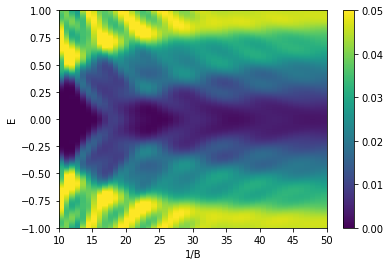

In [7]:
pcolormesh(1/Bran,dos.variable,dat.T)
colorbar()
ylim(-1,1)
clim(0,.05)
xlabel('1/B')
ylabel('E');

We see the developing fishbone structure of the two overlaping harmonic oscillator spectra. 

Now we point the field paralell to the plane of the loop

In [8]:
theta=pi/2
Elim=2
dim=40
broad=0.075

In [9]:
Bran=1/linspace(10,50,50)
dat=[]
for B in tqdm.tqdm_notebook(Bran):
    # Calculate DOS
    # We use jackson kernel here that is good for DOS
    kpm   = pb.kpm(mymodel(dim,theta,B),silent=True,
               energy_range=[-13,13],kernel=pb.jackson_kernel()) 
    # we approximate the bulk dos with the local DOS at the center of the lattice
    # the calculation is performed at this step
    dos=kpm.calc_ldos(energy=linspace(-Elim,Elim,3000),
                  position=[0,0,0],
                  broadening=broad)
    dat.append(dos.data)
dat=array(dat)

HBox(children=(IntProgress(value=0, max=50), HTML(value='')))

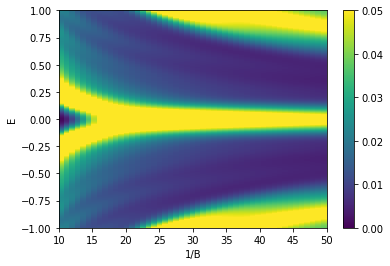

In [10]:
pcolormesh(1/Bran,dos.variable,dat.T)
colorbar()
ylim(-1,1)
clim(0,.05)
xlabel('1/B')
ylabel('E');

We see the developing zero energy Landau level. 